# Black Friday Sales Prediction
### Analytics Vidya Hackathon

## Required Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

## Data Collection

In [100]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [101]:
train_data["User_ID"].unique

<bound method Series.unique of 0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: int64>

In [102]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Statistical View

In [103]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Data Preprossing

In [105]:
train_data["Stay_In_Current_City_Years"].dtypes

dtype('O')

In [106]:
#Object to numaric
train_data.replace( to_replace='4+',
    value='4',
    inplace=True)

In [107]:
#Object to numaric
test_data.replace( to_replace='4+',
    value='4',
    inplace=True)

In [108]:
train_data["Stay_In_Current_City_Years"]=train_data["Stay_In_Current_City_Years"].astype(str).astype(int)

In [109]:
test_data["Stay_In_Current_City_Years"]=test_data["Stay_In_Current_City_Years"].astype(str).astype(int)

In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 48.3+ MB


In [111]:
train_data.shape

(550068, 12)

In [112]:
print(train_data.dtypes)

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


## One Hot Encoding

In [113]:
#features_to_encode = ['Gender', 'City_Category']
train_data = pd.get_dummies(train_data, columns = ['Gender', 'City_Category'])
test_data = pd.get_dummies(test_data, columns = ['Gender', 'City_Category'])

In [115]:
train_data

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0-17,10,2,0,3,NaN,NaN,8370,1,0,1,0,0
1,1000001,P00248942,0-17,10,2,0,1,6.0,14.0,15200,1,0,1,0,0
2,1000001,P00087842,0-17,10,2,0,12,NaN,NaN,1422,1,0,1,0,0
3,1000001,P00085442,0-17,10,2,0,12,14.0,NaN,1057,1,0,1,0,0
4,1000002,P00285442,55+,16,4,0,8,NaN,NaN,7969,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,51-55,13,1,1,20,NaN,NaN,368,0,1,0,1,0
550064,1006035,P00375436,26-35,1,3,0,20,NaN,NaN,371,1,0,0,0,1
550065,1006036,P00375436,26-35,15,4,1,20,NaN,NaN,137,1,0,0,1,0
550066,1006038,P00375436,55+,1,2,0,20,NaN,NaN,365,1,0,0,0,1


In [116]:
print(test_data.dtypes)

User_ID                         int64
Product_ID                     object
Age                            object
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Gender_F                        uint8
Gender_M                        uint8
City_Category_A                 uint8
City_Category_B                 uint8
City_Category_C                 uint8
dtype: object


## 1. Handaling Missing Values - Train Data

In [117]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Gender_F                           0
Gender_M                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64

## Null Values in Heatmap

<AxesSubplot:>

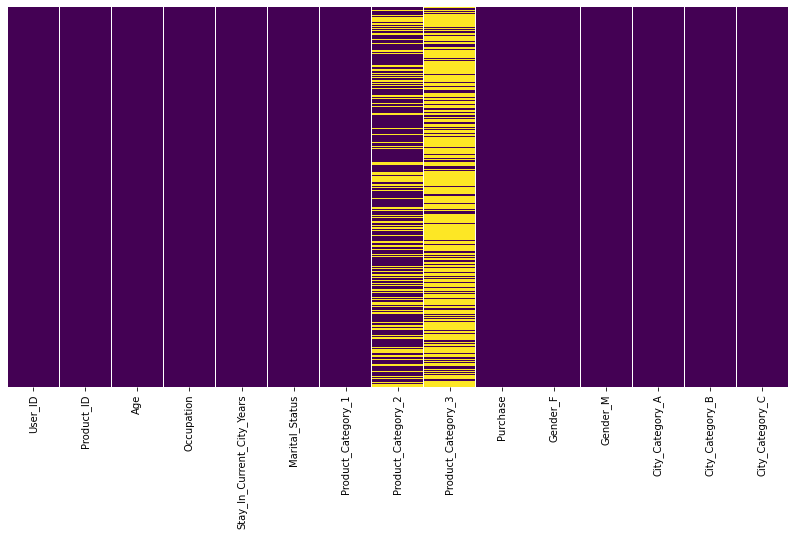

In [118]:
plt.figure(figsize=(14, 7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:>

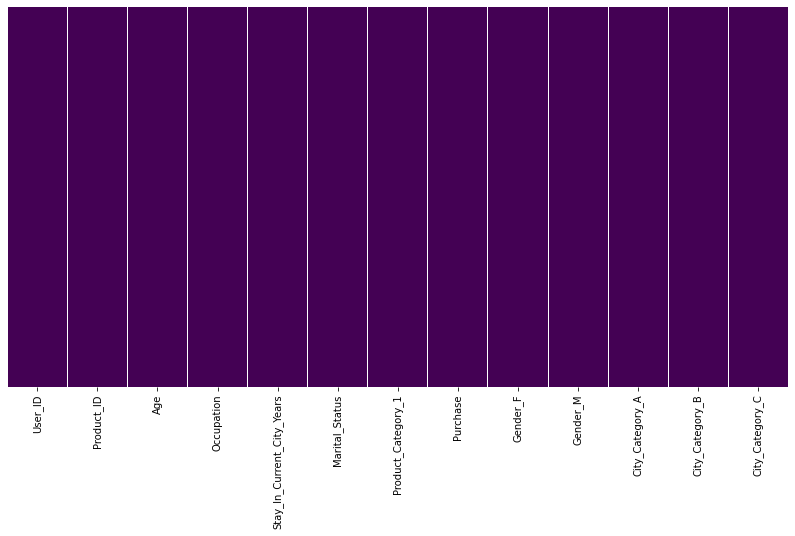

In [119]:
# Remove columns Product_Category_2 and Product_Category_3
train_data = train_data.drop(columns="Product_Category_2")
train_data = train_data.drop(columns="Product_Category_3")
plt.figure(figsize=(14, 7))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## 2. Handaling Missing Values - Test Data

In [120]:
test_data.isnull().sum()

User_ID                            0
Product_ID                         0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
Gender_F                           0
Gender_M                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64

<AxesSubplot:>

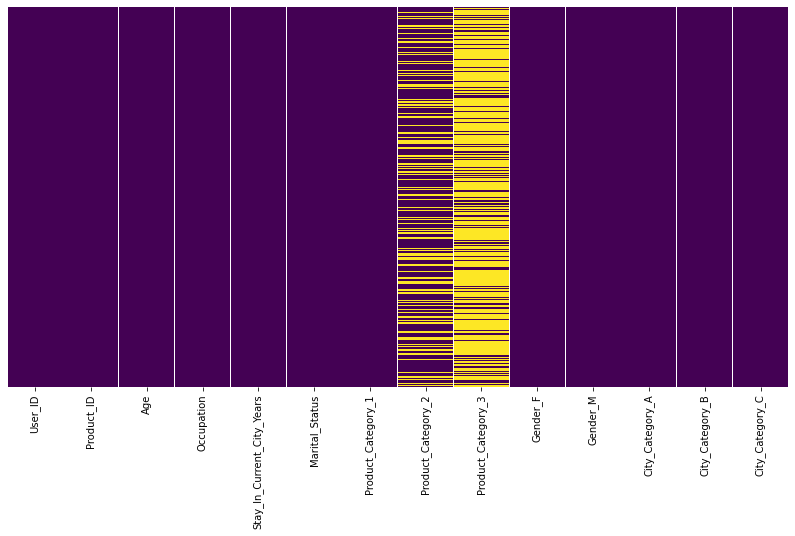

In [121]:
plt.figure(figsize=(14, 7))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot:>

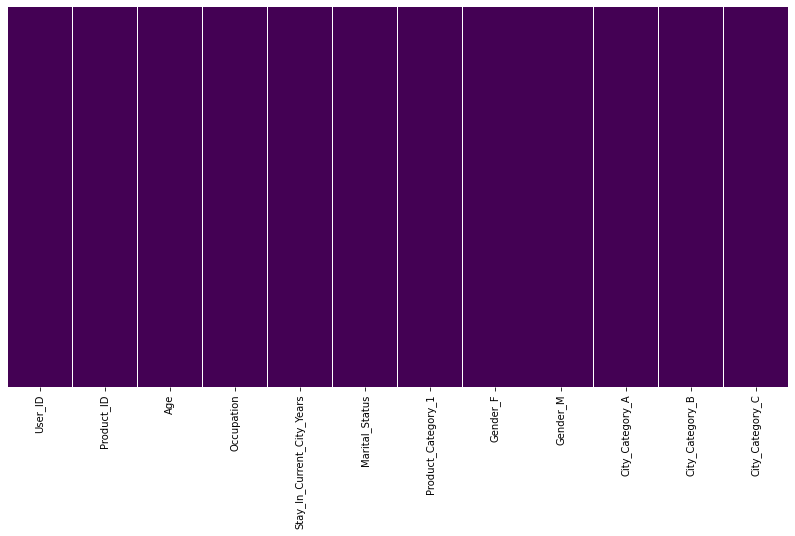

In [122]:
# Remove columns Product_Category_2 and Product_Category_3
test_data = test_data.drop(columns="Product_Category_2")
test_data = test_data.drop(columns="Product_Category_3")
plt.figure(figsize=(14, 7))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="viridis") 

### Label Age Column

In [123]:
train_data["Age"].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [124]:
train_data.replace(to_replace=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], value = [9, 56 , 30, 48, 52, 41, 22], inplace = True)

In [125]:
train_data.Age.dtypes

dtype('int64')

In [126]:
train_data

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,9,10,2,0,3,8370,1,0,1,0,0
1,1000001,P00248942,9,10,2,0,1,15200,1,0,1,0,0
2,1000001,P00087842,9,10,2,0,12,1422,1,0,1,0,0
3,1000001,P00085442,9,10,2,0,12,1057,1,0,1,0,0
4,1000002,P00285442,56,16,4,0,8,7969,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,52,13,1,1,20,368,0,1,0,1,0
550064,1006035,P00375436,30,1,3,0,20,371,1,0,0,0,1
550065,1006036,P00375436,30,15,4,1,20,137,1,0,0,1,0
550066,1006038,P00375436,56,1,2,0,20,365,1,0,0,0,1


## Duplicate Values

In [127]:
#train_data.drop_duplicates(subset = (["User_ID","Product_ID"]), keep = "first", inplace = True)

In [128]:
train_data

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,9,10,2,0,3,8370,1,0,1,0,0
1,1000001,P00248942,9,10,2,0,1,15200,1,0,1,0,0
2,1000001,P00087842,9,10,2,0,12,1422,1,0,1,0,0
3,1000001,P00085442,9,10,2,0,12,1057,1,0,1,0,0
4,1000002,P00285442,56,16,4,0,8,7969,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,52,13,1,1,20,368,0,1,0,1,0
550064,1006035,P00375436,30,1,3,0,20,371,1,0,0,0,1
550065,1006036,P00375436,30,15,4,1,20,137,1,0,0,1,0
550066,1006038,P00375436,56,1,2,0,20,365,1,0,0,0,1


## Data Visualization

Text(0.5, 1.0, 'Correlation Matrix')

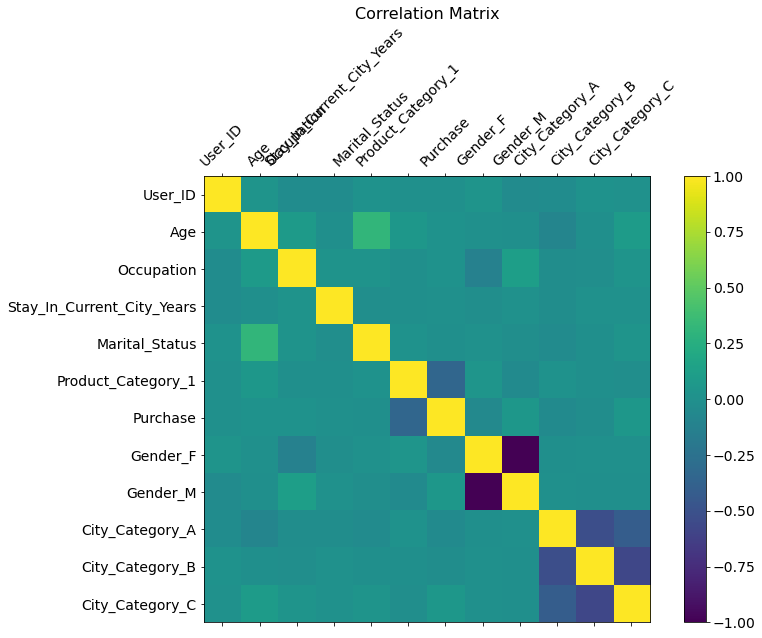

In [129]:
f = plt.figure(figsize=(12, 8))
plt.matshow(train_data.corr(), fignum=f.number)
plt.xticks(range(train_data.select_dtypes(['number']).shape[1]), train_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train_data.select_dtypes(['number']).shape[1]), train_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

<AxesSubplot:>

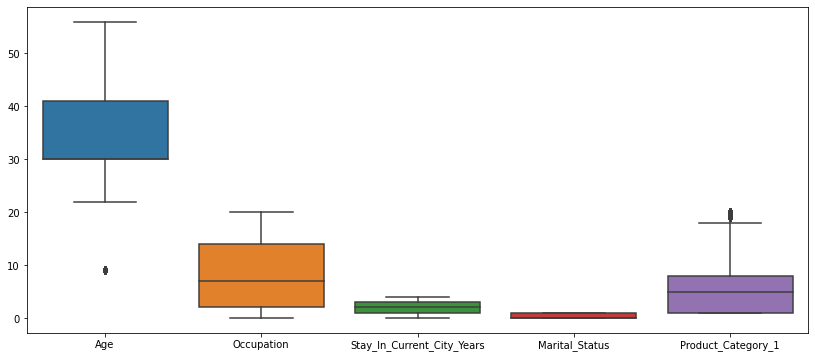

In [131]:
plt.figure(figsize=(14, 6))
x = train_data[[ 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1']]
sns.boxplot(data=x)

<AxesSubplot:xlabel='Age'>

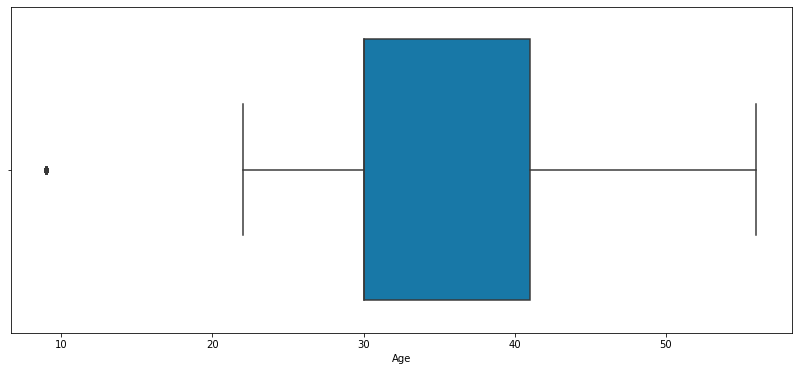

In [132]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Age",data=train_data,palette='winter')

<AxesSubplot:xlabel='Product_Category_1'>

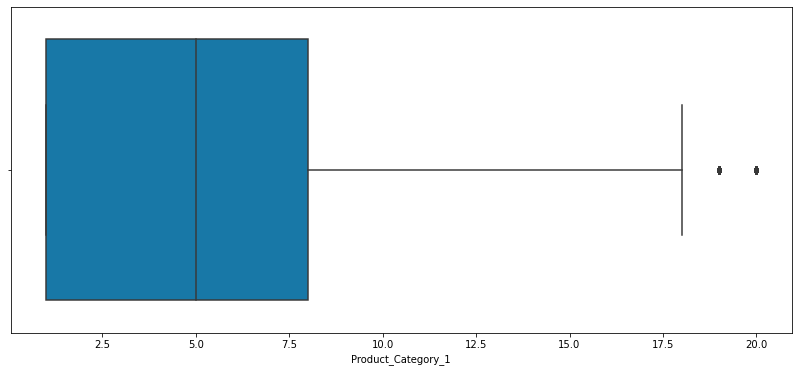

In [133]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Product_Category_1",data=train_data,palette='winter')

<AxesSubplot:xlabel='Purchase'>

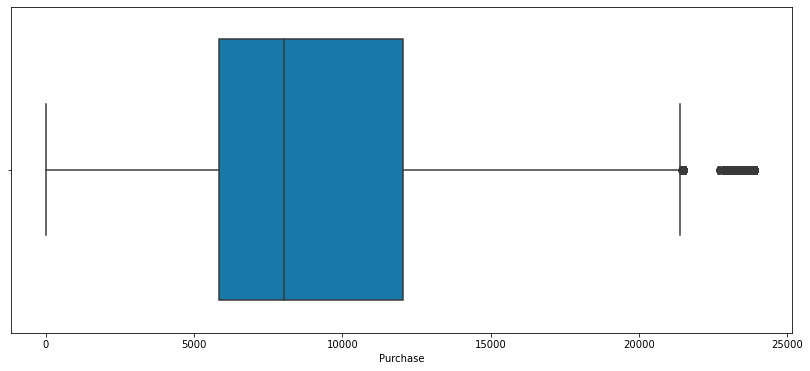

In [134]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Purchase",data=train_data,palette='winter')

# Detacting Outlires Using Z-score
  ### Formula of Z-Score is 
  ### Z-Score=(Obzervation - Mean)/Standard deviation
  ### Z-Score = (X - μ) / σ

### Outlires Remove - Purchase

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

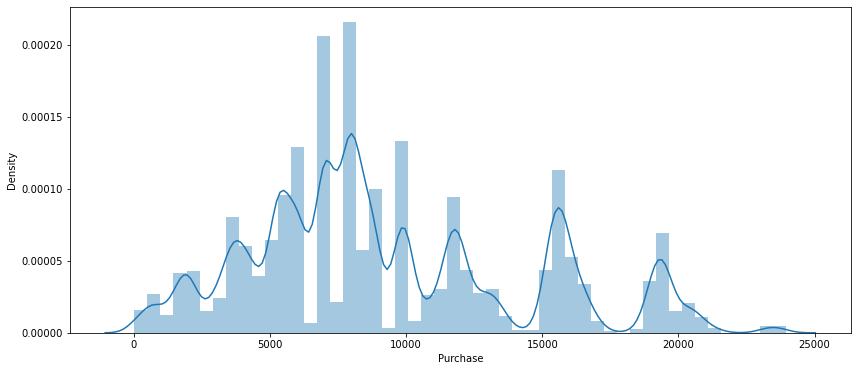

In [136]:
plt.figure(figsize=(14, 6))
sns.distplot(train_data['Purchase'])

In [137]:
upper_limit = train_data['Purchase'].quantile(0.99)
lower_limit = train_data['Purchase'].quantile(0.01)

In [138]:
new_df = train_data[(train_data['Purchase'] <= 74.78) & (train_data['Purchase'] >= 58.13)]

In [139]:
train_data['Purchase'] = np.where(train_data['Purchase'] >= upper_limit,
        upper_limit,
        np.where(train_data['Purchase'] <= lower_limit,
        lower_limit,
        train_data['Purchase']))

<AxesSubplot:xlabel='Purchase'>

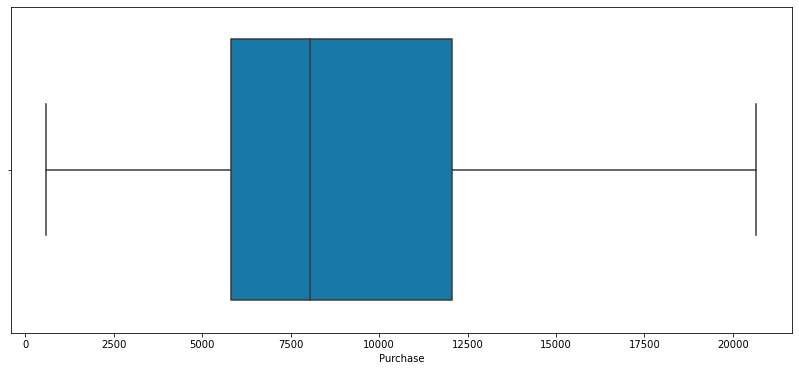

In [140]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Purchase",data=train_data,palette='winter')

## 1. Label Encoding - Train data

In [141]:
# Appling Lebel Encoder to all Columns
label_encoder = preprocessing.LabelEncoder()
objList = train_data.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    train_data[feat] = le.fit_transform(train_data[feat].astype(str))

print (train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Purchase                    550068 non-null  float64
 8   Gender_F                    550068 non-null  uint8  
 9   Gender_M                    550068 non-null  uint8  
 10  City_Category_A             550068 non-null  uint8  
 11  City_Category_B             550068 non-null  uint8  
 12  City_Category_C             550068 non-null  uint8  
dtypes: float64(1),

## 2. Label Encoding - Test data

In [142]:
# Appling Lebel Encoder to all Columns
label_encoder = preprocessing.LabelEncoder()
objList = test_data.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    test_data[feat] = le.fit_transform(test_data[feat].astype(str))

print (test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     233599 non-null  int64
 1   Product_ID                  233599 non-null  int32
 2   Age                         233599 non-null  int32
 3   Occupation                  233599 non-null  int64
 4   Stay_In_Current_City_Years  233599 non-null  int32
 5   Marital_Status              233599 non-null  int64
 6   Product_Category_1          233599 non-null  int64
 7   Gender_F                    233599 non-null  uint8
 8   Gender_M                    233599 non-null  uint8
 9   City_Category_A             233599 non-null  uint8
 10  City_Category_B             233599 non-null  uint8
 11  City_Category_C             233599 non-null  uint8
dtypes: int32(3), int64(4), uint8(5)
memory usage: 10.9 MB
None


In [143]:
train_data

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,672,9,10,2,0,3,8370.0,1,0,1,0,0
1,1000001,2376,9,10,2,0,1,15200.0,1,0,1,0,0
2,1000001,852,9,10,2,0,12,1422.0,1,0,1,0,0
3,1000001,828,9,10,2,0,12,1057.0,1,0,1,0,0
4,1000002,2734,56,16,4,0,8,7969.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,52,13,1,1,20,587.0,0,1,0,1,0
550064,1006035,3568,30,1,3,0,20,587.0,1,0,0,0,1
550065,1006036,3568,30,15,4,1,20,587.0,1,0,0,1,0
550066,1006038,3568,56,1,2,0,20,587.0,1,0,0,0,1


## Split out Dataset

In [144]:
X=train_data.drop(columns=['Purchase'])
Y=train_data['Purchase']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

## Standarize Data

In [145]:
x_train.std()

User_ID                       1727.041810
Product_ID                    1011.763444
Age                             10.823070
Occupation                       6.521579
Stay_In_Current_City_Years       1.289156
Marital_Status                   0.491781
Product_Category_1               3.937406
Gender_F                         0.431128
Gender_M                         0.431128
City_Category_A                  0.443205
City_Category_B                  0.493695
City_Category_C                  0.462743
dtype: float64

In [146]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
print(x_train_std.std())

1.0000000000000004


In [147]:
x_train=x_train_std

In [148]:
x_test.std()

User_ID                       1728.878796
Product_ID                    1013.221648
Age                             10.843016
Occupation                       6.525191
Stay_In_Current_City_Years       1.290115
Marital_Status                   0.491746
Product_Category_1               3.933428
Gender_F                         0.431388
Gender_M                         0.431388
City_Category_A                  0.443205
City_Category_B                  0.493382
City_Category_C                  0.463531
dtype: float64

In [149]:
x_test_std = scaler.transform(x_test)
print(x_test_std.std())

1.0005709985345457


In [150]:
x_test=x_test_std

## Evaluate Algorithm

In [151]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
#models.append(('LASSO', Lasso()))
#models.append(('EN', ElasticNet()))
#models.append(('KNN', KNeighborsRegressor()))
#models.append(('CART', DecisionTreeRegressor()))
#models.append(('RR', Ridge()))
#models.append(('RR', GradientBoostingRegressor()))
#models.append(('RR', ExtraTreesRegressor()))
#models.append(('RR', AdaBoostRegressor()))
models.append(('RFR', RandomForestRegressor()))

#models.append(('SVR', SVR()))
# '''

In [152]:
results = []
names = []
for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print ("                                                   ")
    print ("```````````````````````````````````````````````````")
    print ("Algorithnm :",model)
    print ("```````````````````````````````````````````````````")
    print ('R Squared =',r2_score(y_test, pred))
    print ('MAE       =',mean_absolute_error(y_test, pred))
    print ('MSE       =',mean_squared_error(y_test, pred))
    print ('RMSE      =',sqrt(mean_squared_error(y_test, pred)))

                                                   
```````````````````````````````````````````````````
Algorithnm : LinearRegression()
```````````````````````````````````````````````````
R Squared = 0.1315602069652445
MAE       = 3570.640561732017
MSE       = 21567910.143919945
RMSE      = 4644.126413430188
                                                   
```````````````````````````````````````````````````
Algorithnm : RandomForestRegressor()
```````````````````````````````````````````````````
R Squared = 0.697658151531451
MAE       = 2014.9535413068638
MSE       = 7508732.180188515
RMSE      = 2740.2065944356304


In [153]:
rf = RandomForestRegressor(n_estimators=100, random_state = True)
#rf = AdaBoostRegressor()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print ('RMSE      =', sqrt(mean_squared_error(y_test, rf_pred)))

RMSE      = 2738.691645168426


## Saving the Model

In [154]:
import pickle
with open("Trained_Model.pickle", "wb") as file:
    pickle.dump(rf, file)

## Prediction

In [160]:
# Upload File Here
raw_input = pd.read_csv("test.csv")
raw_input = raw_input.drop(columns="Product_Category_2")
raw_input = raw_input.drop(columns="Product_Category_3")
# One hot encoding
raw_input = pd.get_dummies(raw_input, columns = ['Gender', 'City_Category'])
# Object to numaric
raw_input.replace( to_replace='4+',
    value='4',
    inplace=True)
raw_input["Stay_In_Current_City_Years"]=raw_input["Stay_In_Current_City_Years"].astype(str).astype(int)
# Label "Age" Column
raw_input.replace(to_replace=['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], value = [9, 56 , 30, 48, 52, 41, 22], inplace = True)
raw_input

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000004,P00128942,48,7,2,1,1,0,1,0,1,0
1,1000009,P00113442,30,17,0,0,3,0,1,0,0,1
2,1000010,P00288442,41,1,4,1,5,1,0,0,1,0
3,1000010,P00145342,41,1,4,1,4,1,0,0,1,0
4,1000011,P00053842,30,1,1,0,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,30,15,4,1,8,1,0,0,1,0
233595,1006036,P00254642,30,15,4,1,5,1,0,0,1,0
233596,1006036,P00031842,30,15,4,1,1,1,0,0,1,0
233597,1006037,P00124742,48,1,4,0,10,1,0,0,0,1


In [161]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
objList = raw_input.select_dtypes(include = "object").columns
#print (objList)
le = LabelEncoder()

for feat in objList:
    raw_input[feat] = le.fit_transform(raw_input[feat].astype(str))

#print (x.info())
# Standarize
raw_input_std = scaler.transform(raw_input)
raw_input = raw_input_std
raw_input

array([[-1.75131217, -0.55604822,  1.27227595, ..., -0.60592544,
         1.17311037, -0.67123415],
       [-1.74841705, -0.70430441, -0.39084028, ..., -0.60592544,
        -0.85243471,  1.48979309],
       [-1.74783802,  0.95418818,  0.62550853, ..., -0.60592544,
         1.17311037, -0.67123415],
       ...,
       [ 1.74136982, -1.38727127, -0.39084028, ..., -0.60592544,
         1.17311037, -0.67123415],
       [ 1.74194885, -0.59459483,  1.27227595, ..., -0.60592544,
        -0.85243471,  1.48979309],
       [ 1.7431069 ,  1.20029346,  1.27227595, ..., -0.60592544,
         1.17311037, -0.67123415]])

In [162]:
predictions = rf.predict(raw_input)
predictions

array([10609.35, 10745.35,  4990.67, ..., 11244.01, 18764.91,  2248.05])

In [163]:
submission = pd.read_csv("test.csv")

In [164]:
submission.shape

(233599, 11)

In [165]:
predictions.shape

(233599,)

## Creating a new DataFrame for Submission

In [166]:
data = {'Purchase':[],
        'User_ID':[],
        'Product_ID':[]}
df = pd.DataFrame(data)


In [167]:
df["Purchase"] = predictions
df["User_ID"] = submission["User_ID"]
df["Product_ID"] = submission["Product_ID"]
df

,Purchase,User_ID,Product_ID
0,10609.35,1000004,P00128942
1,10745.35,1000009,P00113442
2,4990.67,1000010,P00288442
3,2219.99,1000010,P00145342
4,2451.65,1000011,P00053842
...,...,...,...
233594,7262.86,1006036,P00118942
233595,5919.55,1006036,P00254642
233596,11244.01,1006036,P00031842
233597,18764.91,1006037,P00124742


## Save to csv Format

In [168]:
df.to_csv("Final_output.csv", index=False)
print(df)

        Purchase  User_ID Product_ID
0       10609.35  1000004  P00128942
1       10745.35  1000009  P00113442
2        4990.67  1000010  P00288442
3        2219.99  1000010  P00145342
4        2451.65  1000011  P00053842
...          ...      ...        ...
233594   7262.86  1006036  P00118942
233595   5919.55  1006036  P00254642
233596  11244.01  1006036  P00031842
233597  18764.91  1006037  P00124742
233598   2248.05  1006039  P00316642

[233599 rows x 3 columns]
